# Elliptic Partial Differential Equations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from helper import Approx
from scipy.sparse import spdiags

# from scipy.sparse.linalg import spsolve
from sympy import Derivative as D
from sympy import Eq, Function, Symbol, solve, symbols

In [2]:
x, y = symbols("x, y")
U = symbols("U", cls=Function)(x, y)
f = symbols("f", cls=Function)(x, y)

## Laplace's equation

In [3]:
Eq(D(U, x, 2) + D(U, y, 2), 0)

Eq(Derivative(U(x, y), (x, 2)) + Derivative(U(x, y), (y, 2)), 0)

## Poisson's equation

In [4]:
Eq(D(U, x, 2) + D(U, y, 2), f)

Eq(Derivative(U(x, y), (x, 2)) + Derivative(U(x, y), (y, 2)), f(x, y))

## Discretising a two-dimensional domain

$$
\Delta x=
\dfrac{x_{\max}-x_{\min}}{N_x-1}
$$

$$
\Delta y=
\dfrac{y_{\max}-y_{\min}}{N_y-1}
$$

$$
x_{i}=
x_{\min}+i\Delta x
$$

$$
y_{j}=
y_{\min}+j\Delta y
$$

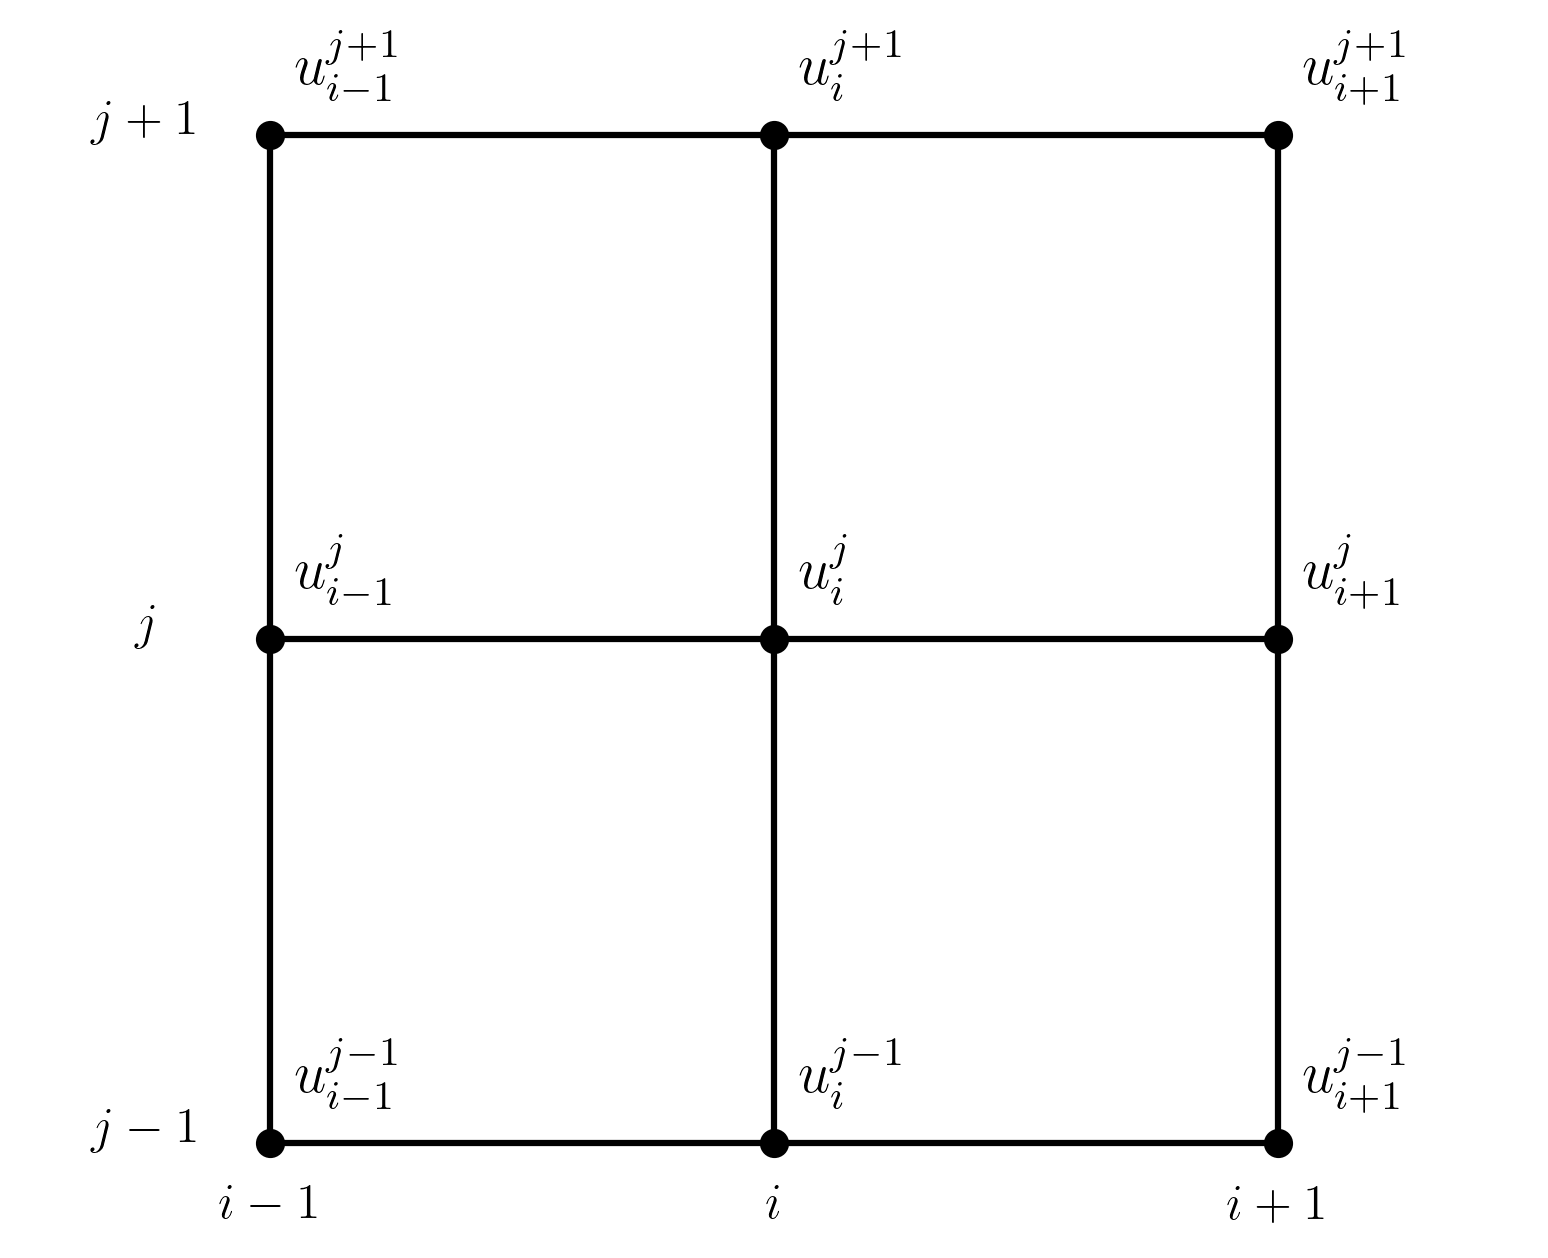

In [5]:
fig = plt.figure()
for i in range(3):
    plt.plot((0, 2), (i, i), "k")

for j in range(3):
    plt.plot((j, j), (0, 2), "k")

plt.plot(0, 0, "ko")
plt.plot(1, 0, "ko")
plt.plot(2, 0, "ko")
plt.plot(0, 1, "ko")
plt.plot(1, 1, "ko")
plt.plot(2, 1, "ko")
plt.plot(0, 2, "ko")
plt.plot(1, 2, "ko")
plt.plot(2, 2, "ko")
ax = fig.gca()
ax.axis("off")
ax.axis("equal")
plt.text(0, -0.15, "$i-1$", ha="center", fontsize=12)
plt.text(1, -0.15, "$i$", ha="center", fontsize=12)
plt.text(2, -0.15, "$i+1$", ha="center", fontsize=12)
plt.text(-0.25, 0, "$j-1$", ha="center", fontsize=12)
plt.text(-0.25, 1, "$j$", ha="center", fontsize=12)
plt.text(-0.25, 2, "$j+1$", ha="center", fontsize=12)
plt.text(0.05, 0.1, "$u^{j-1}_{i-1}$", fontsize=14)
plt.text(1.05, 0.1, "$u^{j-1}_{i}$", fontsize=14)
plt.text(2.05, 0.1, "$u^{j-1}_{i+1}$", fontsize=14)
plt.text(0.05, 1.1, "$u^{j}_{i-1}$", fontsize=14)
plt.text(1.05, 1.1, "$u^{j}_{i}$", fontsize=14)
plt.text(2.05, 1.1, "$u^{j}_{i+1}$", fontsize=14)
plt.text(0.05, 2.1, "$u^{j+1}_{i-1}$", fontsize=14)
plt.text(1.05, 2.1, "$u^{j+1}_{i}$", fontsize=14)
plt.text(2.05, 2.1, "$u^{j+1}_{i+1}$", fontsize=14);
# plt.text(-0.45, 2, "$y$")
# plt.text(2.5, 0, "$x$")

### Boundary conditions


#### Dirichlet boundary conditions

$$
\begin{aligned}
u_{0}&=\alpha\\
u_{N-1}&=\beta
\end{aligned}
$$

$$
\begin{aligned}
u_{0}&=f\left(t,x,y\right)\\
u_{N-1}&=g\left(t,x,y\right)
\end{aligned}
$$

$$
\begin{aligned}
u_{0}&=u_{N-2}\\
u_{N-1}&=u_{1}
\end{aligned}
$$

#### Neumann boundary conditions

$$
\begin{aligned}
u_{-1}&=u_{1}\\
u_{N}&=u_{N-2}
\end{aligned}
$$

$$
\begin{aligned}
v_{-1}&=-v_{1}\\
v_{N}&=-v_{N-2}
\end{aligned}
$$

In [6]:
f = symbols("f", cls=Function)(U)

In [7]:
Eq(D(U, x), f)

Eq(Derivative(U(x, y), x), f(U(x, y)))

### Deriving a FDS to solve Laplace's equation

In [8]:
x, y = symbols("x y")
dx = Symbol(r"\Delta x")
dy = Symbol(r"\Delta y")
U = Function("U")

In [9]:
_ = U(x + dx, y).series(x=dx, x0=0, n=4).removeO().simplify()
__ = U(x - dx, y).series(x=dx, x0=0, n=4).removeO().simplify()
U_xx = Approx(
    D(U(x, y), x, 2),
    solve(Eq(_ + __, U(x + dx, y) + U(x - dx, y)), D(U(x, y), x, 2))[0],
)

In [10]:
U_xx

Eq(Derivative(U(x, y), (x, 2)), (-2*U(x, y) + U(-\Delta x + x, y) + U(\Delta x + x, y))/\Delta x**2)

In [11]:
_ = U(x, y + dy).series(x=dy, x0=0, n=4).removeO().simplify()
__ = U(x, y - dy).series(x=dy, x0=0, n=4).removeO().simplify()
U_yy = Approx(
    D(U(x, y), y, 2),
    solve(Eq(_ + __, U(x, y + dy) + U(x, y - dy)), D(U(x, y), y, 2))[0],
)

In [12]:
U_yy

Eq(Derivative(U(x, y), (y, 2)), (-2*U(x, y) + U(x, -\Delta y + y) + U(x, \Delta y + y))/\Delta y**2)

#### Second-order finite-difference scheme to solve Laplace's equation

$$
u^{j}_{i}=
\dfrac{{\left(\Delta y\right)}^{2}\left(u^{j}_{i-1}+u^{j}_{i+1}\right)+{\left(\Delta x\right)}^{2}\left(u^{j-1}_{i}+u^{j+1}_{i}\right)}
{2\left({\left(\Delta x\right)}^{2}+{\left(\Delta y\right)}^{2}\right)}
$$

#### Solving Laplace's equation

$$
0\leq x\leq 4,\quad
0\leq y\leq 3.
$$

In [13]:
N_x, N_y = 5, 4
x, dx = np.linspace(start=0, stop=4, num=N_x, retstep=True)
y, dy = np.linspace(start=0, stop=3, num=N_y, retstep=True)

In [14]:
x

array([0., 1., 2., 3., 4.])

In [15]:
y

array([0., 1., 2., 3.])

In [16]:
def Creating_Matrix_A(Nx, Ny, r):
    # Diagonal principal
    diag0 = np.tile(np.full(Nx, 1 - 4 * r), Nx)
    # Diagonal principal superior
    diag1 = np.tile(np.concatenate((np.array([0.0, 2 * r]), np.full(Nx - 2, r))), Nx)
    # Diagonal principal inferior
    diag_1 = np.flip(diag1)

    # Diagonal superior
    diag_sup = np.concatenate(
        (np.zeros(Nx), np.full(Nx, 2 * r), np.tile(np.full(Nx, r), Nx - 2))
    )
    # Diagonal inferior
    diag_inf = np.flip(diag_sup)

    # Retornando Matriz sparse
    return spdiags(
        [diag_inf, diag_1, diag0, diag1, diag_sup],
        [-Nx, -1, 0, 1, Nx],
        Nx**2,
        Ny**2,
    ).tocsr()

In [17]:
A = Creating_Matrix_A(2, 2, 0.5)

In [18]:
A.todense()

matrix([[-1.,  1.,  1.,  0.],
        [ 1., -1.,  0.,  1.],
        [ 1.,  0., -1.,  1.],
        [ 0.,  1.,  1., -1.]])